In [2]:
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import roc_auc_score

This task is about predicting the probability of lenders getting delima of finance in the next coming two years.

In [3]:
columns = pd.read_excel('Data Dictionary.xls')

In [4]:
columns

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Variable Name,Description,Type
1,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
2,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
3,age,Age of borrower in years,integer
4,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
5,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
6,MonthlyIncome,Monthly income,real
7,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
8,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
9,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer


We can see from the above table that there are 11 variables given.

1. Explore Data Analysis

In [5]:
train = pd.read_csv('cs-training.csv')
train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
train.shape

(150000, 12)

In [7]:
test = pd.read_csv('cs-test.csv')

In [8]:
test.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [9]:
test.shape

(101503, 12)

2. Feature Project

2.1 SeriousDlqin2yrs

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

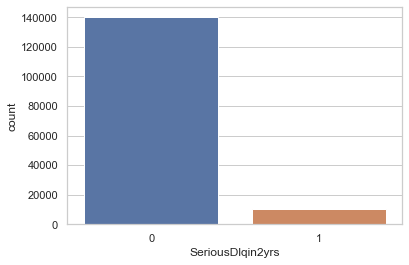

In [10]:
sns.set_theme(style="whitegrid")
sns.countplot(x='SeriousDlqin2yrs',data=train)

In [11]:
train.SeriousDlqin2yrs.value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

2.2 RevolvingUtilizationOfUnsecuredLines

<AxesSubplot:xlabel='RevolvingUtilizationOfUnsecuredLines'>

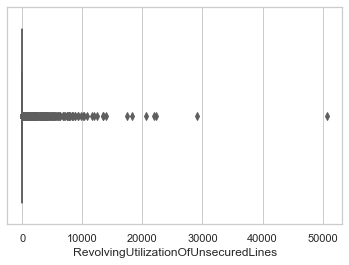

In [12]:
sns.boxplot(data=train, x='RevolvingUtilizationOfUnsecuredLines', color='#95a5a6')

2.3 age

/Users/linkeke/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

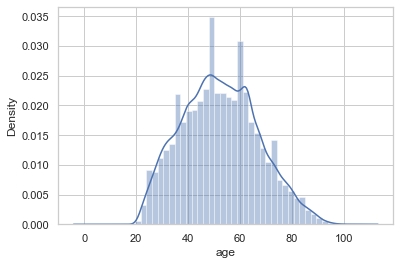

In [13]:
sns.distplot(train.age)

/Users/linkeke/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

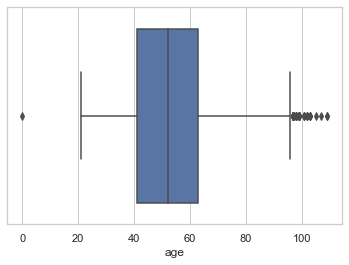

In [14]:
sns.boxplot(train.age)

/Users/linkeke/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


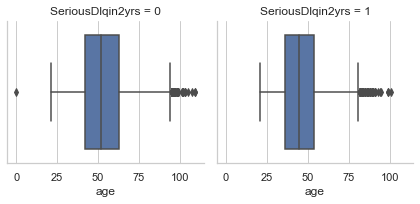

In [15]:
g = sns.FacetGrid(train, col='SeriousDlqin2yrs')
g.map(sns.boxplot, 'age')

In [16]:
train[train.age>100]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
7763,7764,0,0.069167,101,0,50.000000,NaN,2,0,0,0,0.0
19884,19885,0,1.000000,103,0,0.000000,1600.0,3,0,0,0,0.0
25561,25562,0,0.009866,102,0,0.002424,3300.0,3,0,0,0,0.0
40007,40008,0,0.064748,107,0,939.000000,NaN,9,0,1,0,0.0
56761,56762,0,0.003469,105,0,2.000000,NaN,4,0,0,0,NaN
57967,57968,0,0.001397,103,0,1798.500000,1.0,11,0,2,0,0.0
90937,90938,0,0.000000,102,0,0.000000,NaN,12,0,0,0,0.0
93813,93814,0,0.025780,101,0,0.013797,1666.0,5,0,0,0,0.0
96450,96451,0,0.109642,102,0,0.273844,3417.0,7,0,0,0,1.0
105790,105791,0,0.109307,109,0,2141.000000,NaN,17,0,1,0,NaN


2.4 NumberOfTime30-59DaysPastDueNotWorse

/Users/linkeke/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumberOfTime30-59DaysPastDueNotWorse', ylabel='count'>

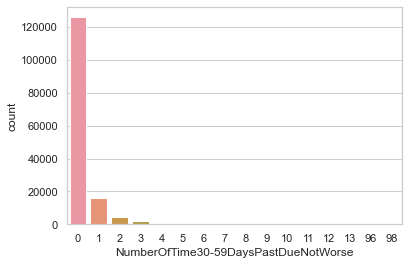

In [17]:
sns.countplot(train['NumberOfTime30-59DaysPastDueNotWorse'])

In [18]:
train.loc[train['NumberOfTime30-59DaysPastDueNotWorse']>=96]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1733,1734,1,1.0,27,98,0.0,2700.0,0,98,0,98,0.0
2286,2287,0,1.0,22,98,0.0,NaN,0,98,0,98,0.0
3884,3885,0,1.0,38,98,12.0,NaN,0,98,0,98,0.0
4417,4418,0,1.0,21,98,0.0,0.0,0,98,0,98,0.0
4705,4706,0,1.0,21,98,0.0,2000.0,0,98,0,98,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
147774,147775,1,1.0,68,98,255.0,NaN,0,98,0,98,0.0
149153,149154,1,1.0,24,98,54.0,NaN,0,98,0,98,0.0
149239,149240,0,1.0,26,98,0.0,2000.0,0,98,0,98,0.0
149439,149440,1,1.0,34,98,9.0,NaN,0,98,0,98,0.0


In [19]:
#set 15 as the maximum times of Overdue
train.loc[train['NumberOfTime30-59DaysPastDueNotWorse']>15, 'NumberOfTime30-59DaysPastDueNotWorse'] = 15

2.5 DebtRatio

/Users/linkeke/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DebtRatio', ylabel='Density'>

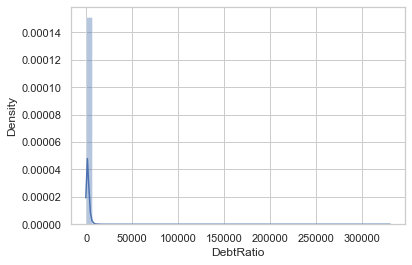

In [20]:
sns.distplot(train.DebtRatio)

In [21]:
train[train.DebtRatio>10000]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
90,91,0,0.039388,51,0,15466.0,0.0,7,0,0,0,0.0
844,845,0,0.734284,45,0,11311.0,0.0,6,0,2,1,0.0
1156,1157,0,0.926060,48,1,12546.0,NaN,8,0,4,0,0.0
2664,2665,0,0.819907,58,0,10370.0,NaN,17,0,3,0,0.0
4854,4855,0,0.000000,56,0,168835.0,NaN,10,0,3,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
147216,147217,0,0.845973,68,0,10752.0,NaN,26,0,3,0,0.0
147310,147311,0,0.173502,69,0,12403.0,NaN,31,0,9,0,0.0
147773,147774,1,0.412257,40,0,12702.0,NaN,12,0,2,0,0.0
148872,148873,0,0.897637,47,2,20351.0,NaN,9,0,5,0,2.0


2.6 MonthlyIncome

In [22]:
train.loc[train.MonthlyIncome.isnull()]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
6,7,0,0.305682,57,0,5710.0,NaN,8,0,3,0,0.0
8,9,0,0.116951,27,0,46.0,NaN,2,0,0,0,NaN
16,17,0,0.061086,78,0,2058.0,NaN,10,0,2,0,0.0
32,33,0,0.083418,62,0,977.0,NaN,6,0,1,0,0.0
41,42,0,0.072898,81,0,75.0,NaN,7,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149976,149977,0,0.000627,76,0,60.0,NaN,5,0,0,0,0.0
149977,149978,0,0.236450,29,0,349.0,NaN,3,0,0,0,0.0
149984,149985,0,0.037548,84,0,25.0,NaN,5,0,0,0,0.0
149992,149993,0,0.871976,50,0,4132.0,NaN,11,0,1,0,3.0


In [23]:
train.loc[train.MonthlyIncome.isnull(), 'SeriousDlqin2yrs'].sum()

1669

In [24]:
#Fill none value with mean value
train['MonthlyIncome'] = train['MonthlyIncome'].fillna(train['MonthlyIncome'].mean())

2.7 NumberOfOpenCreditLinesAndLoans

/Users/linkeke/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumberOfOpenCreditLinesAndLoans', ylabel='Density'>

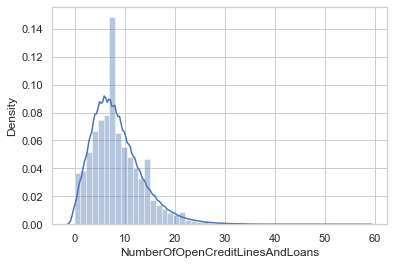

In [25]:
sns.distplot(train.NumberOfOpenCreditLinesAndLoans)

/Users/linkeke/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/linkeke/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


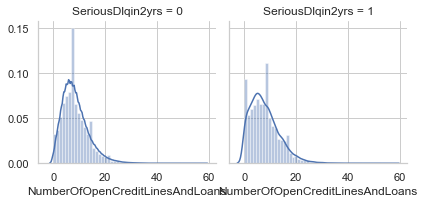

In [26]:
g = sns.FacetGrid(train, col='SeriousDlqin2yrs')
g.map(sns.distplot,'NumberOfOpenCreditLinesAndLoans')

2.8 NumberOfTimes90DaysLate

/Users/linkeke/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumberOfTimes90DaysLate', ylabel='count'>

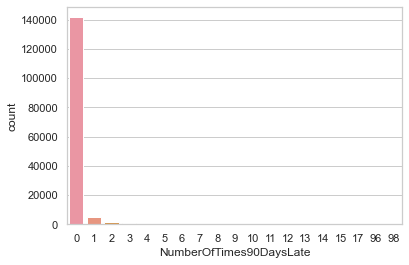

In [27]:
sns.countplot(train.NumberOfTimes90DaysLate)

/Users/linkeke/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


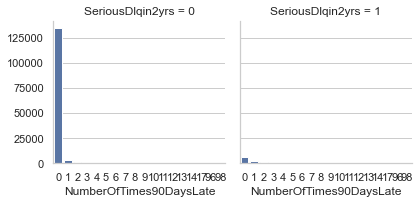

In [28]:
g = sns.FacetGrid(train, col='SeriousDlqin2yrs')
g.map(sns.countplot, 'NumberOfTimes90DaysLate')

In [29]:
train.loc[train.NumberOfTimes90DaysLate > train['NumberOfTime60-89DaysPastDueNotWorse']]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
13,14,1,0.964673,40,3,0.382965,13700.0,9,3,1,1,2.0
49,50,0,0.000080,70,0,0.256340,6900.0,21,1,1,0,0.0
68,69,0,0.004264,31,0,0.111444,2000.0,6,1,0,0,2.0
72,73,0,0.827708,56,0,0.369591,6793.0,15,1,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149954,149955,1,1.000000,46,0,170.398010,401.0,3,2,0,0,2.0
149961,149962,1,0.920107,31,1,0.176732,1125.0,4,1,0,0,0.0
149962,149963,0,1.005733,48,0,0.248896,2944.0,4,3,0,0,1.0
149968,149969,1,0.983825,55,0,0.064116,4600.0,2,1,0,0,6.0


2.9 NumberRealEstateLoansOrLines

/Users/linkeke/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumberRealEstateLoansOrLines', ylabel='count'>

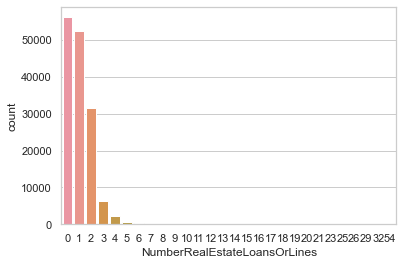

In [30]:
sns.countplot(train.NumberRealEstateLoansOrLines)

/Users/linkeke/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


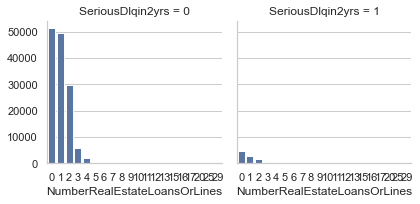

In [31]:
g = sns.FacetGrid(train, col='SeriousDlqin2yrs')
g.map(sns.countplot, 'NumberRealEstateLoansOrLines')

/Users/linkeke/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumberOfTime60-89DaysPastDueNotWorse', ylabel='count'>

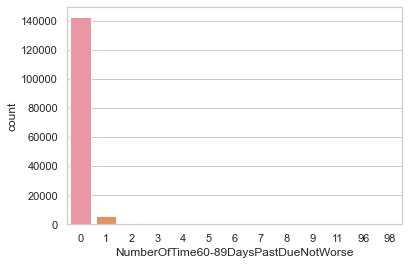

In [32]:
sns.countplot(train['NumberOfTime60-89DaysPastDueNotWorse'])

/Users/linkeke/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


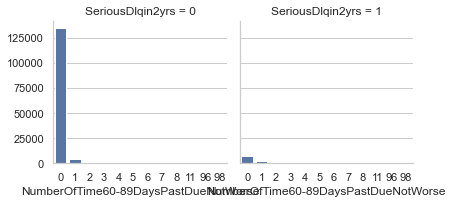

In [33]:
g = sns.FacetGrid(train, col='SeriousDlqin2yrs')
g.map(sns.countplot, 'NumberOfTime60-89DaysPastDueNotWorse')

In [34]:

train.loc[train['NumberOfTime60-89DaysPastDueNotWorse'] > train['NumberOfTime30-59DaysPastDueNotWorse']  ]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
50,51,0,0.818978,73,0,3095.000000,0.000000,9,0,1,1,0.0
87,88,0,0.003750,64,0,0.004061,3200.000000,5,0,0,1,0.0
92,93,0,0.784836,52,0,2662.000000,6670.221237,10,0,2,1,0.0
95,96,0,0.245353,37,0,0.288417,6500.000000,11,1,1,1,0.0
123,124,0,0.444838,58,0,0.366545,14000.000000,9,0,2,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149894,149895,0,0.017904,55,0,1058.000000,6670.221237,8,0,1,1,NaN
149910,149911,0,0.117427,39,0,0.122474,4800.000000,11,0,0,1,2.0
149935,149936,0,1.000000,61,0,5.000000,6670.221237,1,0,0,1,0.0
149939,149940,0,1.049900,26,0,0.073220,6500.000000,6,0,0,1,0.0


In [35]:
train.loc[train['NumberOfTime60-89DaysPastDueNotWorse']>15, 'NumberOfTime60-89DaysPastDueNotWorse'] = 15

2.11 NumberOfDependents

/Users/linkeke/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


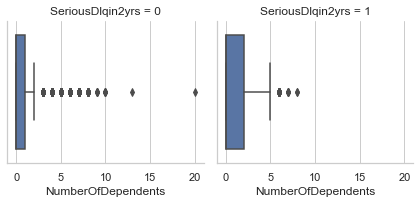

In [36]:
g = sns.FacetGrid(train, col='SeriousDlqin2yrs')
g.map(sns.boxplot, 'NumberOfDependents')

In [37]:
train['NumberOfDependents'] = train['NumberOfDependents'].fillna(0)

2.11 Correlation Analysis

<AxesSubplot:>

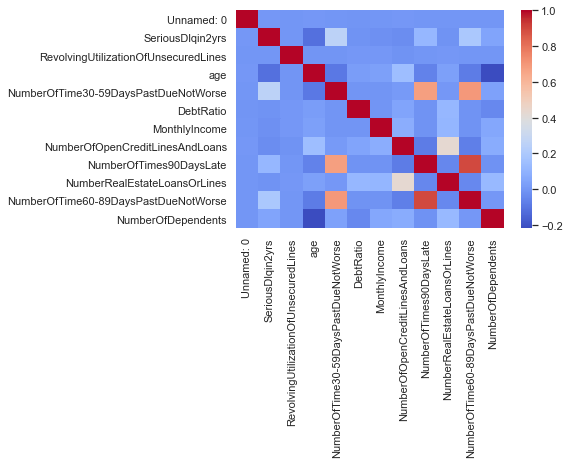

In [38]:
sns.heatmap(train.corr(),cmap="coolwarm",annot=False)

3 Model

In [39]:
train_X = train[train.columns[2:]]
train_y = train[train.columns[1]]
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.1,  random_state=42, stratify=train_y)

In [40]:
val_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 108706 to 6713
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RevolvingUtilizationOfUnsecuredLines  15000 non-null  float64
 1   age                                   15000 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  15000 non-null  int64  
 3   DebtRatio                             15000 non-null  float64
 4   MonthlyIncome                         15000 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       15000 non-null  int64  
 6   NumberOfTimes90DaysLate               15000 non-null  int64  
 7   NumberRealEstateLoansOrLines          15000 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  15000 non-null  int64  
 9   NumberOfDependents                    15000 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 1.3 MB


3.1 Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

grid = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={
        'n_estimators':[30,50,80,100,200]
    },
    scoring='roc_auc',
    verbose=3
)

grid.fit(train_X, train_y)
# for result in grid.cv_results_:
    # print(result, grid.cv_results_[result])
grid.best_params_['n_estimators']

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=30 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... n_estimators=30, score=0.814, total=   5.2s
[CV] n_estimators=30 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


[CV] ..................... n_estimators=30, score=0.820, total=   4.9s
[CV] n_estimators=30 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.2s remaining:    0.0s


[CV] ..................... n_estimators=30, score=0.822, total=   4.6s
[CV] n_estimators=30 .................................................
[CV] ..................... n_estimators=30, score=0.821, total=   4.5s
[CV] n_estimators=30 .................................................
[CV] ..................... n_estimators=30, score=0.828, total=   4.4s
[CV] n_estimators=50 .................................................
[CV] ..................... n_estimators=50, score=0.826, total=   7.4s
[CV] n_estimators=50 .................................................
[CV] ..................... n_estimators=50, score=0.832, total=   7.3s
[CV] n_estimators=50 .................................................
[CV] ..................... n_estimators=50, score=0.832, total=   7.8s
[CV] n_estimators=50 .................................................
[CV] ..................... n_estimators=50, score=0.836, total=   9.2s
[CV] n_estimators=50 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  6.3min finished


200

In [48]:
def draw_roc(FPR, TPR, label=None):
    plt.figure(figsize=(8,6))
    plt.plot(FPR, TPR,'b', linewidth=2, label=label)
    plt.plot([0,1],[0,1], "r--") 
    plt.xlim([0, 1])   
    plt.ylim([0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate")

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [52]:
rfc = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'])
rfc.fit(train_X, train_y)
y_pred = rfc.predict_proba(val_X)[:,1]
score = roc_auc_score(val_y, y_pred)
print(score)

0.8502471438296385


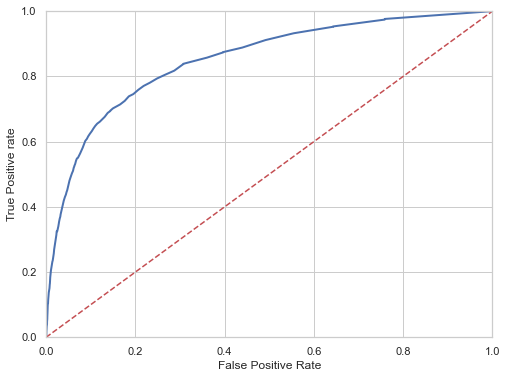

In [53]:
import matplotlib.pyplot as plt
# 绘制ROC曲线
FPR_rf, TPR_rf, THRESH_rf = roc_curve(val_y, y_pred)
draw_roc(FPR_rf, TPR_rf)

3.2 Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(val_X, val_y)
y_pred = gaussian.predict_proba(val_X)[:,1]
score = roc_auc_score(val_y, y_pred)
print(score)

0.7938635689701633


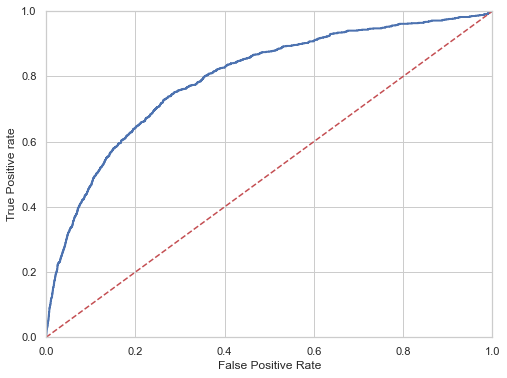

In [55]:
# 绘制ROC曲线
FPR_gaussian, TPR_gaussian, THRESH_gaussian = roc_curve(val_y, y_pred)
draw_roc(FPR_gaussian, TPR_gaussian)


3.3 SVM of Different Kernel

In [40]:
import time 

In [43]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split as ts



#split the data to  7:3
X_train,X_test,y_train,y_test = ts(train_X,train_y,test_size=0.1)

# select different type of kernel function and compare the score

# kernel = 'rbf'
begin = time.time()
clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(X_train,y_train)
score_rbf = clf_rbf.score(X_test,y_test)
print("The score of rbf is : %f"%score_rbf)
end = time.time()
print("training time:",end-begin,"s")


The score of rbf is : 0.931037
training time: 115.54710602760315 s


In [45]:
# kernel = 'poly'
begin = time.time()
clf_poly = svm.SVC(kernel='poly')
clf_poly.fit(X_train,y_train)
score_poly = clf_poly.score(X_test,y_test)
print("The score of poly is : %f"%score_poly)
end = time.time()
print("training time:",end-begin,"s")

In [56]:
#LGBM optimism
grid = GridSearchCV(
    estimator=LGBMClassifier(),
    param_grid={
        'n_estimators':range(45,55),
        'learning_rate':[0.05,0.1,0.15,0.2,0.25,0.3]
    },
    scoring='roc_auc',
    verbose=1
)
grid.fit(train_X, train_y)

grid.best_params_['n_estimators'], grid.best_params_['learning_rate']

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  1.2min finished


(52, 0.1)

In [62]:
import time 

3.4 RF的改进

In [63]:
# 用线性回归模型
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(train_X,train_y,random_state=111)

# 调用线性回归函数，C为正则化系数，l1表示L1正则化
logit = LogisticRegression(random_state=111, solver='saga', penalty='l1', class_weight='balanced', C=1.0, max_iter=500)

# 标准化拟合
scaler = StandardScaler().fit(X_train)

# 标准化X_train 和X_test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 线性回归拟合
begin = time.time()
logit.fit(X_train_scaled, y_train)

# 输入训练集，返回每个样本对应到每种分类结果的概率
logit_scores_proba = logit.predict_proba(X_train_scaled)

# 返回分类1的概率
logit_scores = logit_scores_proba[:,1]
end = time.time()
print('training time:',end-begin,'s')

training time: 9.850603818893433 s


In [61]:
# 画图
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,10))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], "k--") # 画直线做参考
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate")

AUC Score :  0.8052199131992341


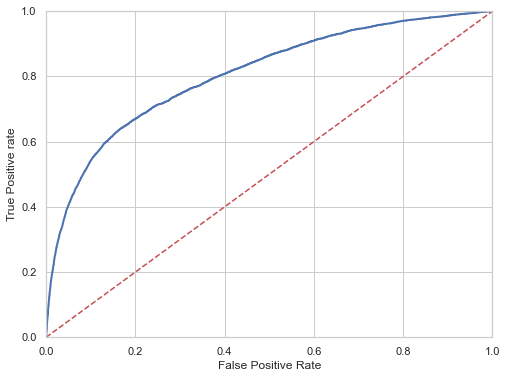

In [65]:
# roc_curve根据分类结果和分类概率，返回false positive rage和true positive rate
fpr_logit, tpr_logit, thresh_logit = roc_curve(y_train, logit_scores)

# 画图
draw_roc(fpr_logit,tpr_logit)
print('AUC Score : ', (roc_auc_score(y_train,logit_scores)))

AUC Score : 0.8052347654330085


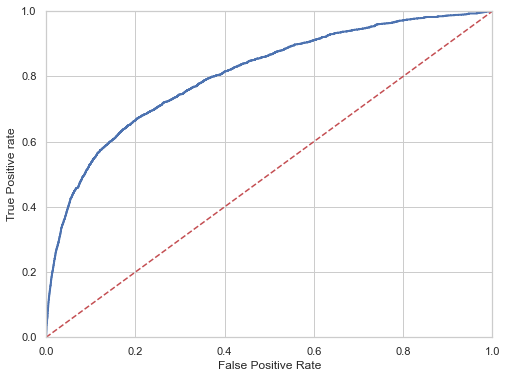

In [67]:
# 验证测试集，测试分类结果概率分布
logit_scores_proba_val = logit.predict_proba(X_test_scaled)

# 分类结果为1的概率
logit_scores_val = logit_scores_proba_val[:,1]

# roc_curve根据分类结果和分类概率，返回false positive rage和true positive rate
fpr_logit_val, tpr_logit_val, thresh_logit_val = roc_curve(y_test, logit_scores_val)

# 画图
draw_roc(fpr_logit_val,tpr_logit_val)
print('AUC Score :', (roc_auc_score(y_test,logit_scores_val)))

In [42]:
# 引入降采样模块
from imblearn.under_sampling import RandomUnderSampler
# Counter类的目的是用来跟踪值出现的次数
from collections import Counterx
print('Original dataset shape :', Counter(train_y))

Original dataset shape : Counter({0: 125977, 1: 9023})


In [43]:
# 调用模块
rus = RandomUnderSampler(random_state=111)

# 直接降采样后返回采样后的数值
X_resampled, y_resampled = rus.fit_resample(train_X, train_y)
print('Resampled dataset shape:', Counter(y_resampled))

Resampled dataset shape: Counter({0: 9023, 1: 9023})


In [44]:
# 重新划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_resampled, y_resampled, random_state=111)
X_train_rus.shape, y_train_rus.shape

((13534, 10), (13534,))

AUC score:  0.5787087830478022


/Users/linkeke/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


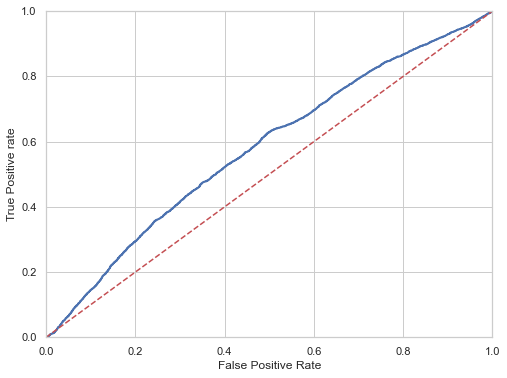

In [50]:
# 对重采样以后的数据进行分类
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
logit_resampled = LogisticRegression(random_state=111, solver='saga', penalty='l1', class_weight='balanced', C=1.0, max_iter=500)

logit_resampled.fit(X_resampled, y_resampled)
logit_resampled_proba_res = logit_resampled.predict_proba(X_resampled)
logit_resampled_scores = logit_resampled_proba_res[:, 1]
fpr_logit_resampled, tpr_logit_resampled, thresh_logit_resampled = roc_curve(y_resampled, logit_resampled_scores)
draw_roc(fpr_logit_resampled, tpr_logit_resampled)
print('AUC score: ', roc_auc_score(y_resampled, logit_resampled_scores))

AUC score: 0.8671432102610513


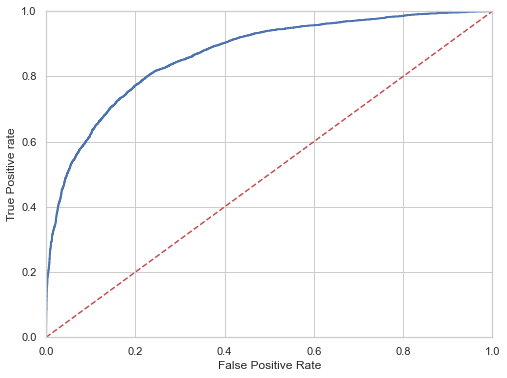

In [52]:
# 采用随机森林法分类和梯度上升法
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
forest = RandomForestClassifier(n_estimators=300, random_state=111, max_depth=5, class_weight='balanced')
forest.fit(X_train_rus, y_train_rus)
y_scores_prob = forest.predict_proba(X_train_rus)
y_scores = y_scores_prob[:, 1]
fpr, tpr, thresh = roc_curve(y_train_rus, y_scores)
draw_roc(fpr, tpr)
print('AUC score:', roc_auc_score(y_train_rus, y_scores))

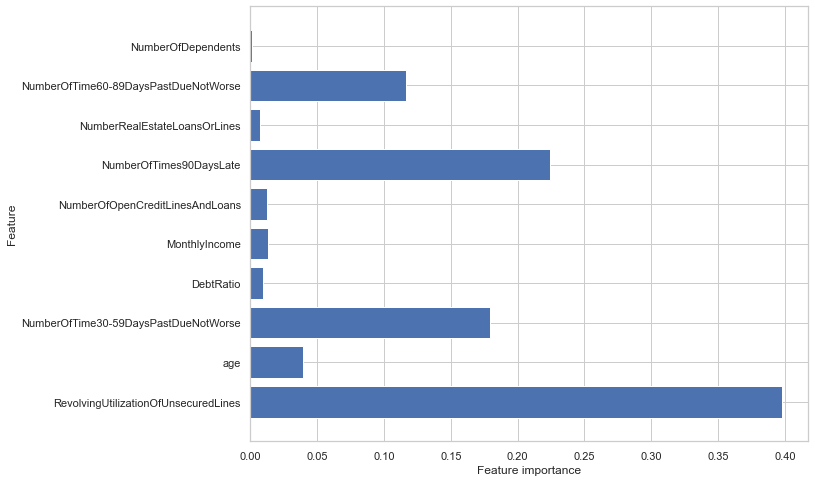

In [54]:
# 看看随机森林法对各个特征的重视程度
def plot_feature_importances(model):
    plt.figure(figsize=(10,8))
    n_features = train_X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train_X.columns)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.ylim(-1, n_features)

plot_feature_importances(forest)